In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cd /content/drive/My Drive/object-detection-nn

/bin/bash: line 0: cd: too many arguments


In [ ]:
!python3 "/content/drive/My Drive/object-detection-nn/train_vgg.py" -d "/content/drive/My Drive/object-detection-nn/animals" -m "/content/drive/My Drive/object-detection-nn/output1/vgg.model" -l "/content/drive/My Drive/object-detection-nn/output1/vgg.pickle" -p "/content/drive/My Drive/object-detection-nn/output1/plot.png"

Using TensorFlow backend.
2020-06-21 07:48:47.907590: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
[INFO] loading images...
panda
[0 0 1]
2020-06-21 08:20:58.368307: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-21 08:20:58.432988: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-06-21 08:20:58.433122: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f0efe89cb213): /proc/driver/nvidia/version does not exist
2020-06-21 08:20:58.458930: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2200000000 Hz
2020-06-21 08:20:58.459280: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2e9b800 initialized for platform Host (this does not guarantee that XLA wil

In [ ]:
%matplotlib inline

In [ ]:
from keras.models import load_model
import argparse
import pickle
import cv2


Using TensorFlow backend.


In [ ]:
args={'image': '/content/drive/My Drive/object-detection-nn/images/dog.jpg', 'model': '/content/drive/My Drive/object-detection-nn/output1/vgg.model', 'label_bin': '/content/drive/My Drive/object-detection-nn/output1/vgg.pickle', 'width': 64, 'height': 64, 'flatten':-1}

In [ ]:
# load the input image and resize it to the target spatial dimensions
image = cv2.imread(args["image"])
output = image.copy()
image = cv2.resize(image, (args["width"], args["height"]))


In [ ]:
# scale the pixel values to [0, 1]
image = image.astype("float") / 255.0


In [ ]:
# check to see if we should flatten the image and add a batch
# dimension
print(image.shape)
if args["flatten"] > 0:
	image = image.flatten()
	image = image.reshape((1, image.shape[0]))

# otherwise, we must be working with a CNN -- don't flatten the
# image, simply add the batch dimension
else:
	image = image.reshape((1, image.shape[0], image.shape[1],
		image.shape[2]))
print(image.shape)

(64, 64, 3)
(1, 64, 64, 3)


In [ ]:
# load the model and label binarizer
print("[INFO] loading network and label binarizer...")
model = load_model(args["model"])
lb = pickle.loads(open(args["label_bin"], "rb").read())


[INFO] loading network and label binarizer...


In [ ]:
# make a prediction on the image
preds = model.predict(image)
print(preds)

# find the class label index with the largest corresponding
# probability
i = preds.argmax(axis=1)[0]
print(i)
label = lb.classes_[i]
print(label)

[[0.77595127 0.20697784 0.01707092]]
0
cats


In [ ]:
# draw the class label + probability on the output image
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)


array([[[171, 154, 133],
        [171, 154, 133],
        [171, 154, 133],
        ...,
        [162, 147, 131],
        [162, 146, 130],
        [162, 146, 130]],

       [[171, 154, 133],
        [171, 154, 133],
        [171, 154, 133],
        ...,
        [162, 147, 131],
        [162, 146, 130],
        [162, 146, 130]],

       [[169, 155, 133],
        [169, 155, 133],
        [169, 155, 133],
        ...,
        [161, 146, 130],
        [162, 146, 130],
        [162, 146, 130]],

       ...,

       [[153, 183, 200],
        [154, 184, 201],
        [155, 185, 202],
        ...,
        [161, 189, 206],
        [161, 189, 206],
        [161, 189, 206]],

       [[154, 184, 201],
        [155, 185, 202],
        [156, 186, 203],
        ...,
        [159, 187, 204],
        [159, 187, 204],
        [160, 188, 205]],

       [[156, 186, 203],
        [156, 186, 203],
        [157, 187, 204],
        ...,
        [157, 185, 202],
        [158, 186, 203],
        [158, 186, 203]]

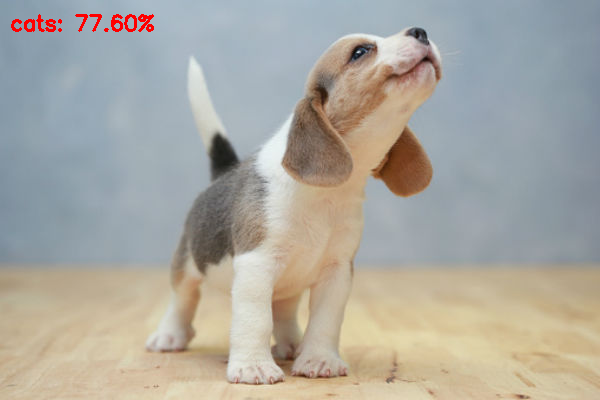

-1

In [ ]:
# show the output image
from google.colab.patches import cv2_imshow
cv2_imshow(output)
cv2.waitKey(0)